In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
path = r"F:\Work\SOCAAutomation\Dataset\Images\VisibilityEstimation"
Files = os.listdir(path)
Files = sorted(Files, key = lambda x: int(os.path.splitext(x)[0]))

In [11]:
def edge_detection(File):
    img = cv.imread(File)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    gradx = cv.Sobel(gray, cv.CV_64F, 1, 0, ksize=3)
    grady = cv.Sobel(gray, cv.CV_64F, 0, 1, ksize=3)
    return gradx, grady, gray

In [7]:
grad_mag_list = []
for frame in Files:
    gradx, grady, gray = edge_detection(path + "/" + frame)
    grad_mag = cv.magnitude(gradx, grady)
    grad_mag_norm = cv.normalize(grad_mag, None, 0, 255, cv.NORM_MINMAX)
    comb_img = cv.addWeighted(gradx, 0.5, grady, 0.5, 0)
    grad_mag_list.append(comb_img.sum())

In [6]:
print(gradx.sum(), grady.sum(), grad_mag.sum(), comb_img.sum())

105094.0 500236.0 8974726.127102105 302665.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, '1.png'),
  Text(1, 0, '2.png'),
  Text(2, 0, '3.png'),
  Text(3, 0, '4.png'),
  Text(4, 0, '5.png'),
  Text(5, 0, '6.png'),
  Text(6, 0, '7.png'),
  Text(7, 0, '8.png'),
  Text(8, 0, '9.png'),
  Text(9, 0, '10.png'),
  Text(10, 0, '11.png'),
  Text(11, 0, '12.png'),
  Text(12, 0, '13.png'),
  Text(13, 0, '14.png')])

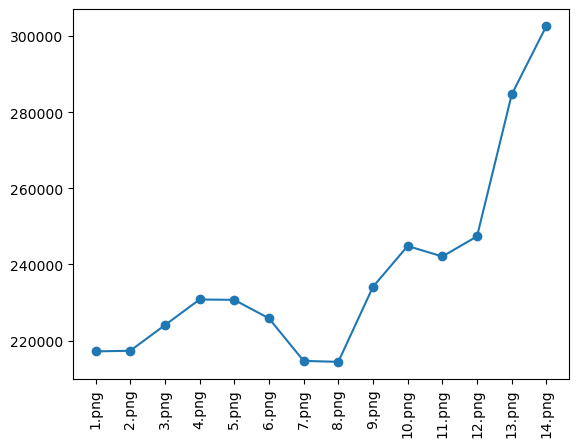

In [8]:
plt.plot(Files, grad_mag_list, marker='o')
plt.xticks(rotation=90)

In [30]:
image_files = [f for f in os.listdir(path) if f.endswith('.png')]

# Sort files numerically
imagefiles = sorted(image_files, key=lambda x: int(os.path.splitext(x)[0]))

In [35]:
os.path.splitext(image_files[1])[0]

'10'

(-0.5, 703.5, 575.5, -0.5)

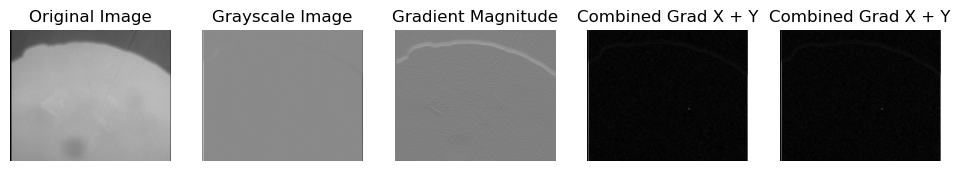

In [39]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 5, 1)
plt.title("Original Image")
plt.imshow(gray, cmap='gray')
plt.axis("off")

plt.subplot(1, 5, 2)
plt.title("Grayscale Image")
plt.imshow(gradx, cmap='gray')
plt.axis("off")

plt.subplot(1, 5, 3)
plt.title("Gradient Magnitude")
plt.imshow(grady, cmap='gray')
plt.axis("off")

plt.subplot(1, 5, 4)
plt.title("Combined Grad X + Y")
#combined_grad = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5, 0)
plt.imshow(grad_mag, cmap='gray')  # Take absolute for visualization
plt.axis("off")

plt.subplot(1, 5, 5)
plt.title("Combined Grad X + Y")
#combined_grad = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5, 0)
plt.imshow(grad_mag_norm, cmap='gray')  # Take absolute for visualization
plt.axis("off")

<Axes: >

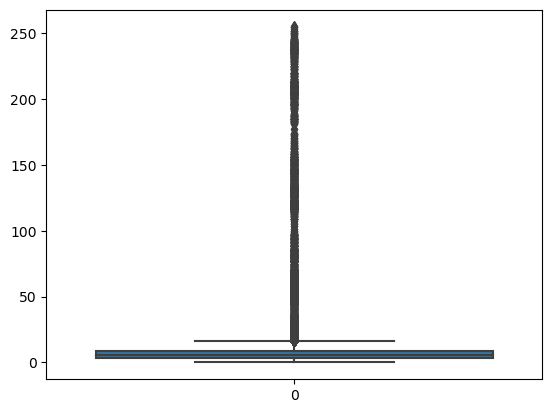

In [42]:
sns.boxplot(grad_mag_norm.flatten())

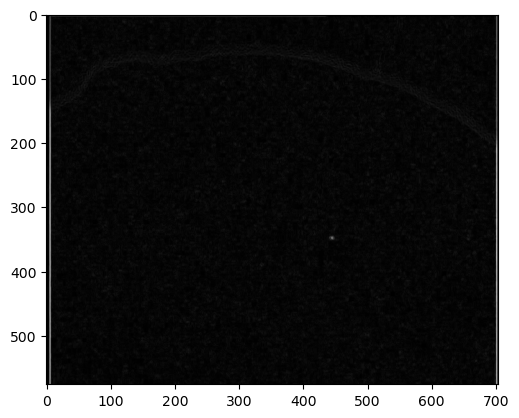

In [43]:
plt.imshow(grad_mag_norm, cmap='gray')

In [12]:
refimg = path + "/" + Files[0]
currimg = path + "/" + Files[9]
ref_gradx, ref_grady, ref_gray = edge_detection(refimg)

curr_gradx, curr_grady, curr_gray = edge_detection(currimg)

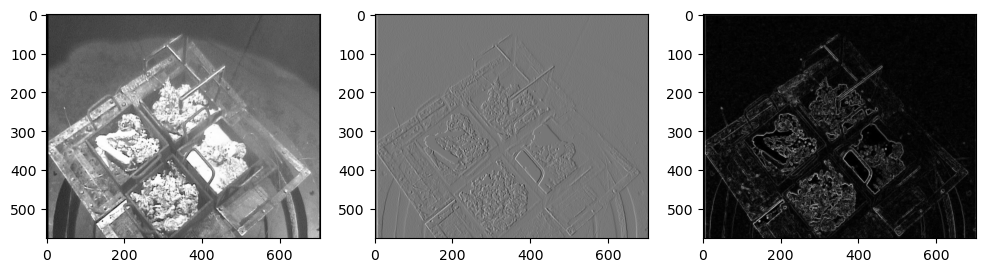

In [17]:
plt.figure(figsize = (12,6))
plt.subplot(1,3,1)
plt.imshow(ref_gray, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(ref_gradx, cmap='gray')
plt.subplot(1,3,3)
ref_grad_mag = cv.magnitude(ref_gradx, ref_grady)

plt.imshow(cv.normalize(ref_grad_mag, None, 0, 255, cv.NORM_MINMAX), cmap='gray')

In [42]:
def plot_images2by2(img1, img2):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    plt.imshow(img1, cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(img2, cmap='gray')

In [19]:
plot_images2by2

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [33]:
res = np.divide(ref_grad_norm, ref_gray.astype('float32'))

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8004\468738043.py:1: RuntimeWarning: divide by zero encountered in divide
  res = np.divide(ref_grad_norm, ref_gray.astype('float32'))
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8004\468738043.py:1: RuntimeWarning: invalid value encountered in divide
  res = np.divide(ref_grad_norm, ref_gray.astype('float32'))


In [34]:
res[res == np.inf] = 1

In [35]:
res[res == np.nan] = 0

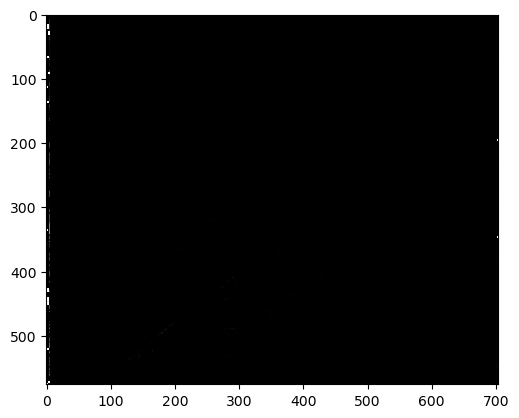

In [36]:
plt.imshow(res, cmap='gray')